## Players Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Data/players/atp_players.csv")

/tmp/ipykernel_3781674/140701393.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../Data/players/atp_players.csv")


In [3]:
df.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set a high-quality theme for seaborn
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv("../../Data/players/atp_players.csv")

# Preprocess the dataset
df['dob'] = pd.to_datetime(df['dob'], format='%Y%m%d', errors='coerce')
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['birth_year'] = df['dob'].dt.year
df['birth_decade'] = (df['birth_year'] // 10) * 10
df['hand'] = df['hand'].fillna('U')  # U = Unknown

# Drop rows with missing birth years
df_viz = df.dropna(subset=['birth_year'])

/tmp/ipykernel_3781674/3408361962.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../Data/players/atp_players.csv")


## Distribution of Playing Hands

/tmp/ipykernel_3781674/424177059.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_post_2000, x='hand', palette=hand_palette_set2, order=['R', 'L', 'U'])


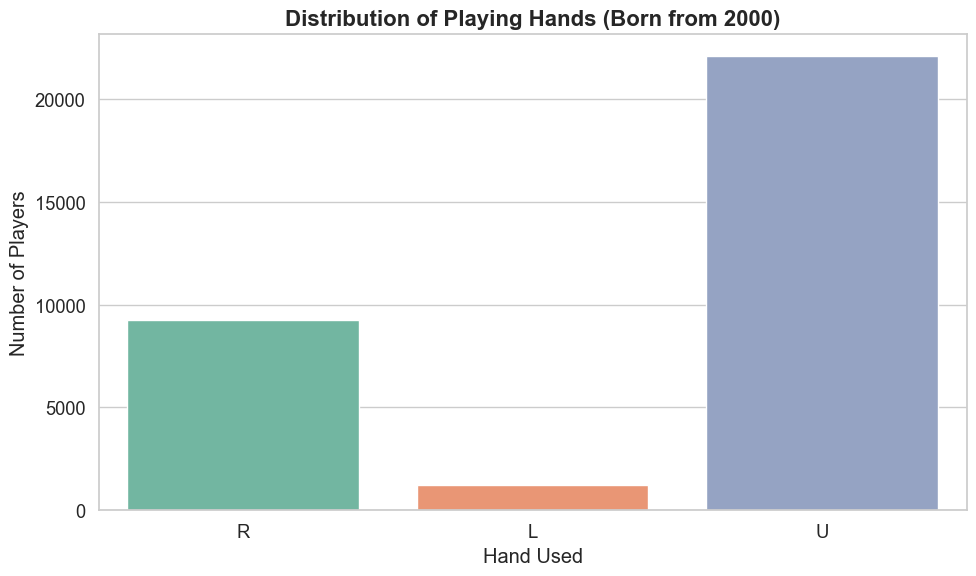

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter players born from 2000 onward
df_post_2000 = df_viz[df_viz['birth_year'] >= 1980]

# Define Set2 colors for each hand type
set2_colors = sns.color_palette("Set2", 3)
hand_palette_set2 = dict(zip(['R', 'L', 'U'], set2_colors))

# Plot
sns.countplot(data=df_post_2000, x='hand', palette=hand_palette_set2, order=['R', 'L', 'U'])
plt.title("Distribution of Playing Hands (Born from 2000)", fontsize=16, weight='bold')
plt.xlabel("Hand Used")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()


## Top 10 Most Represented Nationalities

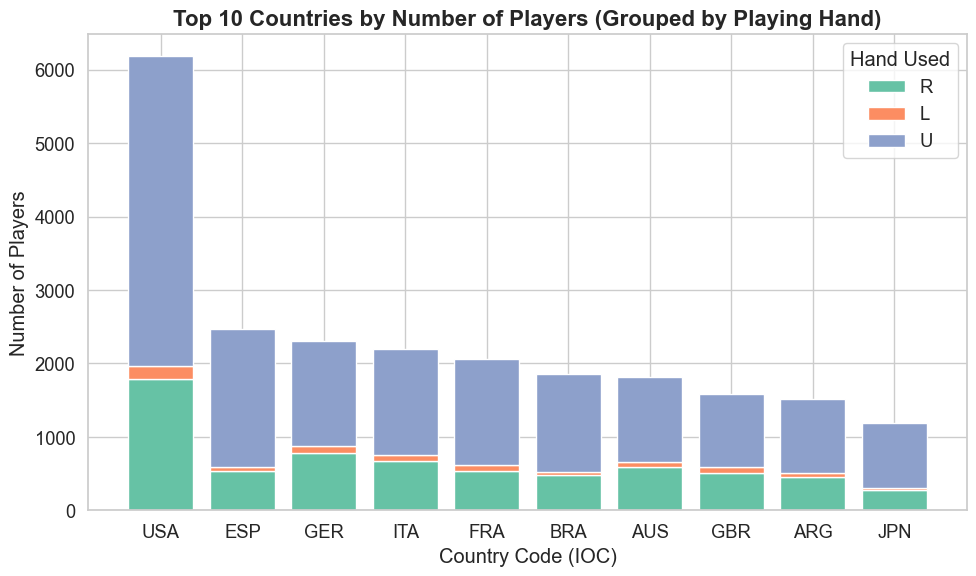

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop duplicates to count unique players
df_viz = df.dropna(subset=['birth_year']).copy()
df_viz['hand'] = df_viz['hand'].fillna('U')
df_viz = df_viz.drop_duplicates(subset='player_id')

# Get top 10 countries by total player count
top_countries = df_viz['ioc'].value_counts().nlargest(10).index
df_top = df_viz[df_viz['ioc'].isin(top_countries)]

# Group by country and hand
grouped = df_top.groupby(['ioc', 'hand']).size().unstack(fill_value=0)[['R', 'L', 'U']]

# Compute total players per country and sort accordingly
grouped['Total'] = grouped.sum(axis=1)
grouped = grouped.sort_values('Total', ascending=False).drop(columns='Total')

# Define Set2 colors and hand order
colors = sns.color_palette("Set2", 3)
hand_labels = ['R', 'L', 'U']

# Plot stacked bars
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None

for i, hand in enumerate(hand_labels):
    ax.bar(grouped.index, grouped[hand], bottom=bottom, label=hand, color=colors[i])
    bottom = grouped[hand] if bottom is None else bottom + grouped[hand]

# Styling
ax.set_title("Top 10 Countries by Number of Players (Grouped by Playing Hand)", fontsize=16, weight='bold')
ax.set_xlabel("Country Code (IOC)")
ax.set_ylabel("Number of Players")
ax.legend(title="Hand Used")
plt.tight_layout()
plt.show()

## Distribution of Birth Years

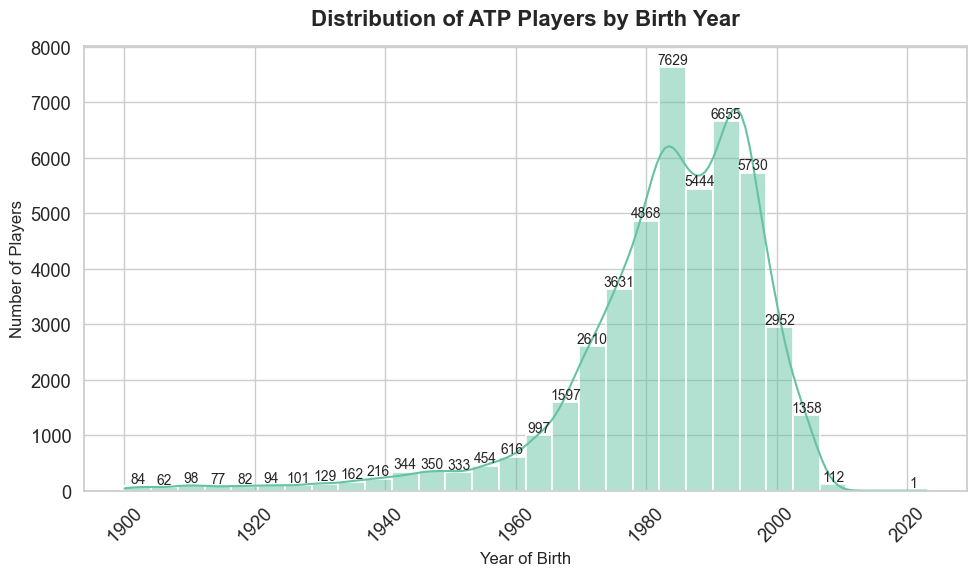

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter realistic years
df_birth_filtered = df_viz[(df_viz['birth_year'] >= 1900) & (df_viz['birth_year'] <= 2025)]

# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)
main_color = sns.color_palette("Set2")[0]

# Create figure and plot
plt.figure(figsize=(10, 6))
hist = sns.histplot(
    df_birth_filtered['birth_year'],
    bins=30,
    kde=True,
    color=main_color,
    edgecolor='white',
    linewidth=1.2
)

# Add annotations on top of each bar
for patch in hist.patches:
    height = patch.get_height()
    if height > 0:  # Avoid clutter
        x = patch.get_x() + patch.get_width() / 2
        plt.text(x, height + 1, f"{int(height)}", ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Distribution of ATP Players by Birth Year", fontsize=16, weight='bold', pad=15)
plt.xlabel("Year of Birth", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Players by Decade of Birth

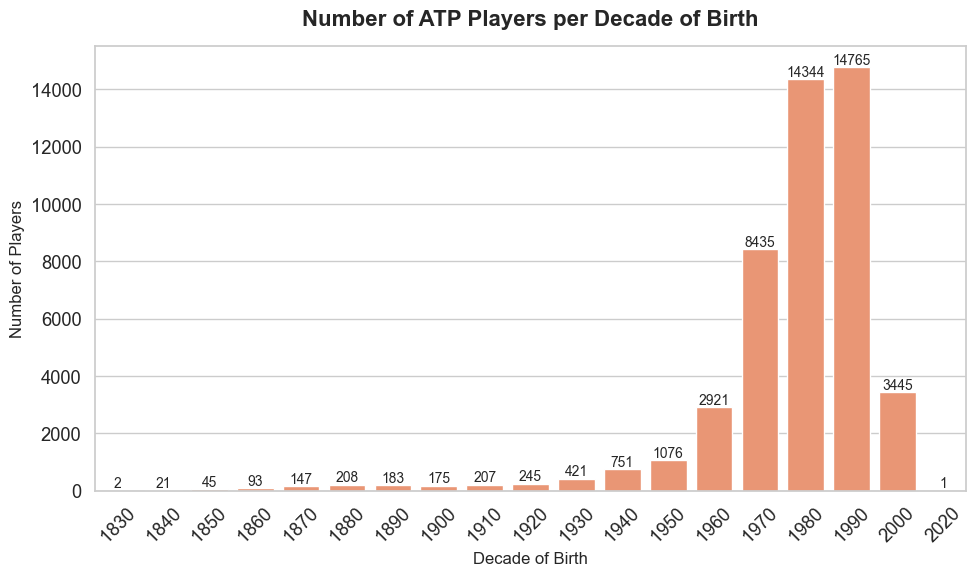

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure birth_decade exists
df_viz['birth_decade'] = (df_viz['birth_year'] // 10) * 10

# Convert to string to force categorical x-axis with clean labels
df_viz['birth_decade_str'] = df_viz['birth_decade'].astype(int).astype(str)
decade_order = sorted(df_viz['birth_decade_str'].dropna().unique())

# Aesthetic setup
sns.set_theme(style="whitegrid", font_scale=1.2)
main_color = sns.color_palette("Set2")[1]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_viz,
    x='birth_decade_str',
    order=decade_order,
    color=main_color
)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Final styling
plt.title("Number of ATP Players per Decade of Birth", fontsize=16, weight='bold', pad=15)
plt.xlabel("Decade of Birth", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Height Distribution of Players

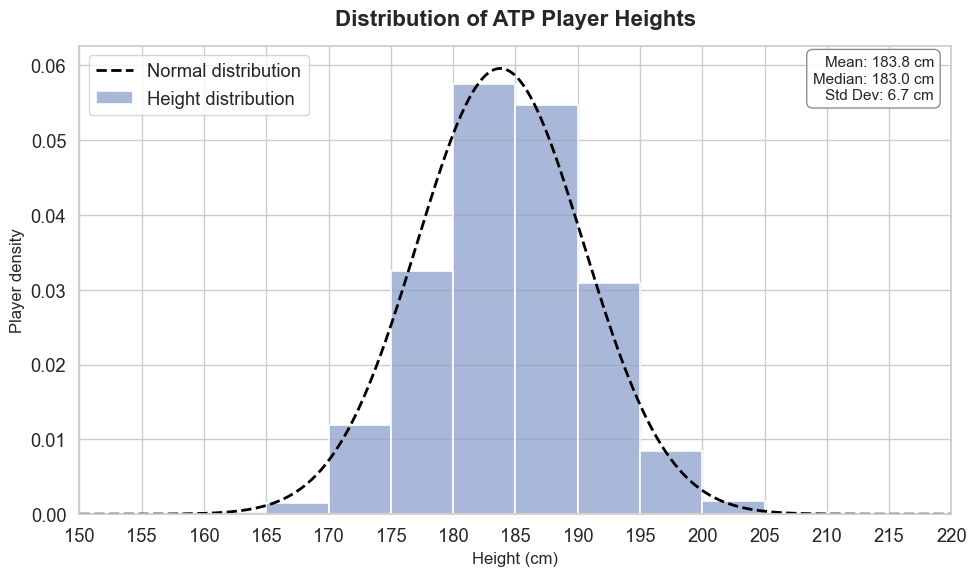

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Filter valid height values
df_height = df_viz[df_viz['height'].between(150, 220)]

# Compute statistics
mean_height = df_height['height'].mean()
median_height = df_height['height'].median()
std_height = df_height['height'].std()

# Set style and main color
sns.set_theme(style="whitegrid", font_scale=1.2)
main_color = sns.color_palette("Set2")[2]

# Define bins and ticks
bin_edges = np.arange(150, 225, 5)
xticks = np.arange(150, 225, 5)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df_height['height'],
    bins=bin_edges,
    kde=False,
    stat='density',  # normalize the bar heights
    color=main_color,
    edgecolor='white',
    linewidth=1.2,
    label="Height distribution"
)

# Add normal curve
x = np.linspace(150, 220, 500)
y = norm.pdf(x, mean_height, std_height)
plt.plot(x, y, color='black', linestyle='--', linewidth=2, label="Normal distribution")

# Titles and labels
plt.title("Distribution of ATP Player Heights", fontsize=16, weight='bold', pad=15)
plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Player density", fontsize=12)
plt.xticks(xticks)
plt.xlim(150, 220)

# Add statistics box
stats_text = (
    f"Mean: {mean_height:.1f} cm\n"
    f"Median: {median_height:.1f} cm\n"
    f"Std Dev: {std_height:.1f} cm"
)

plt.gca().text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    ha='right', va='top',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.9)
)

# Legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()